<center>
    
    Toy datasets and training a simple MLP
    
    Author: Daniel Coble
    
    Status: Finished
</center>

When I first started working with neural nets, I made this project as an exercise and to get familiar with how they work. The typical introduction to machine learning will use a dataset like MNIST. I think that's fine, and it helps students understand NNs applicability, but I also like the idea of creating our own dataset to train the NN against. Then you have to understand how to process the vectors that are inputs into the NN, and it can be an introduction to preprocessing. 

In this project, we create a toy dataset which consists of a 32x32 black and white pixel grid (similar to MNIST), but in this dataset each image contains two lines. It will be the goal of the NN to predict where those two lines will intersect. Therefore, the output is a vector of two elements, and the cost function is this point's distance from the correct point.

Below I create the dataset. There are different ways to create the dataset that will affect the distribution of points and lines. I first select the point anywhere in the grid, then select lines. The lines are chosen from a uniform distribution after 
the point was selected.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import random
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import losses
from math import floor
from sklearn import model_selection


def createplot():
    length = .3
    length_sq = length**2
    point = [random.random(), random.random()]
    x1 = random.random()
    y1 = random.random()
    no_space_line_1 = True
    while(no_space_line_1):
        no_space_line_1 = False
        dist1 = (x1-point[0])**2 + (y1-point[1])**2
        if(dist1 < length_sq):
            no_space_line_1 = True
            x1 = random.random()
            y1 = random.random()
    x2 = random.random()
    y2 = random.random()
    no_space_line_2 = True
    while(no_space_line_2):
        no_space_line_2 = False
        dist2 = (x2-point[0])**2 + (y2-point[1])**2
        if(dist2 < length**2):
            no_space_line_2 = True
            x2 = random.random()
            y2 = random.random()
    
    dist1 = math.sqrt(dist1)
    dist2 = math.sqrt(dist2)
    lineseg_1 = np.array([[x1,y1],[x1 + length*(point[0] - x1)/dist1,y1 + length*(point[1] - y1)/dist1]])
    lineseg_2 = np.array([[x2,y2],[x2 + length*(point[0] - x2)/dist2,y2 + length*(point[1] - y2)/dist2]])
    lineseg_1 = 32*lineseg_1
    lineseg_2 = 32*lineseg_2
    delta_x = 0.01 * (lineseg_1[1,0] - lineseg_1[0,0])
    delta_y = 0.01 * (lineseg_1[1,1] - lineseg_1[0,1])
    x1 *= 32
    y1 *= 32
    
    plot = np.zeros(shape=(32,32))
    for i in range(100):
        x_index = floor(x1 + i*delta_x)
        y_index = floor(y1 + i*delta_y)
        plot[x_index, y_index] += .0678822
    
    x2 *= 32
    y2 *= 32
    delta_x = 0.01 * (lineseg_2[1,0] - lineseg_2[0,0])
    delta_y = 0.01 * (lineseg_2[1,1] - lineseg_2[0,1])
    
    for i in range(100):
        x_index = floor(x2 + i*delta_x)
        y_index = floor(y2 + i*delta_y)
        plot[x_index, y_index] += .0678822
    
    return (plot, point)
    
        

amount = 100000
data = []
for i in range(amount):
    if((i+1) % (amount//10) == 0):
        print(str(round((i+1) / amount * 100)) + "% finished.")
    data.append(createplot())
plots = np.array([data[i][0] for i in range(amount)])
points = np.array([data[i][1] for i in range(amount)])

train_img, test_img, train_label, test_label = model_selection.train_test_split(plots, points, test_size=.2)


#np.save("./dataset/train_img", train_img)
#np.save("./dataset/test_img",test_img)
#np.save("./dataset/train_label", train_label)
#np.save("./dataset/test_label", test_label)

10% finished.
20% finished.
30% finished.
40% finished.
50% finished.
60% finished.
70% finished.
80% finished.
90% finished.
100% finished.


To understand what this dataset looks like, let's plot out a few elements from the dataset.

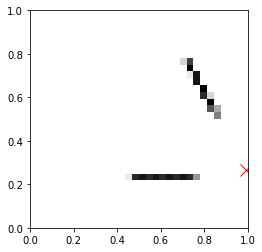

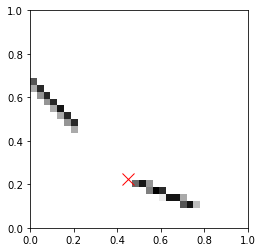

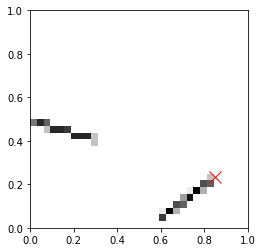

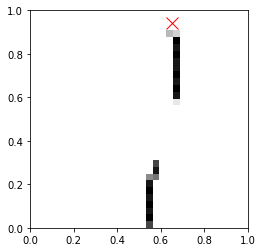

In [17]:
for i in range(4):
    randint = random.randint(0,2000)
    true = test_label[randint] 
    plt.figure()
    plt.imshow(test_img[randint], cmap=mpl.cm.binary, interpolation = 'nearest', origin='lower', extent=[0,1,0,1])
    plt.grid(False)
    plt.plot(true[1], true[0], marker='x', markersize=12, color="red")
    plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import losses


#train_img = np.load("./dataset/train_img.npy")
#train_label = np.load("./dataset/train_label.npy")
#test_img = np.load("./dataset/test_img.npy")
#test_label = np.load("./dataset/test_label.npy")

model = keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.fit(train_img, train_label, epochs=20)

Epoch 1/20
2500/2500 [==============================] - 2s 829us/step - loss: 0.0521 - accuracy: 0.7342
Epoch 2/20
2500/2500 [==============================] - 2s 858us/step - loss: 0.0379 - accuracy: 0.8017
Epoch 3/20
2500/2500 [==============================] - 2s 821us/step - loss: 0.0334 - accuracy: 0.8133
Epoch 4/20
2500/2500 [==============================] - 2s 805us/step - loss: 0.0300 - accuracy: 0.8212
Epoch 5/20
2500/2500 [==============================] - 2s 820us/step - loss: 0.0277 - accuracy: 0.8288
Epoch 6/20
2500/2500 [==============================] - 2s 821us/step - loss: 0.0258 - accuracy: 0.8342
Epoch 7/20
2500/2500 [==============================] - 2s 824us/step - loss: 0.0245 - accuracy: 0.8392
Epoch 8/20
2500/2500 [==============================] - 2s 860us/step - loss: 0.0234 - accuracy: 0.8431
Epoch 9/20
2500/2500 [==============================] - 2s 823us/step - loss: 0.0224 - accuracy: 0.8469
Epoch 10/20
2500/2500 [==============================] - 2s 823u

Now let's plot a few of the model's predictions on the test data to see how it did.

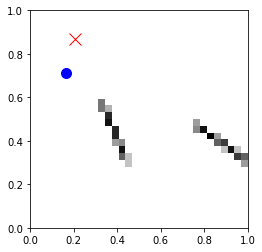

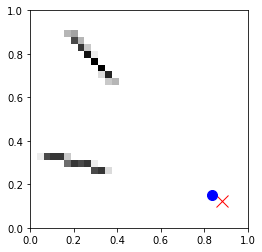

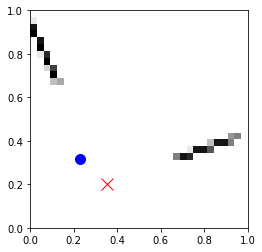

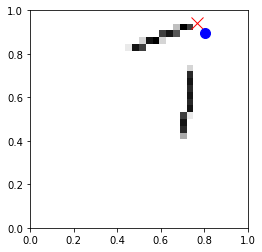

In [21]:
predictions = model.predict(test_img)
for i in range(4):
    randint = random.randint(0,2000)
    true = test_label[randint]
    pred = predictions[randint]
    plt.figure()
    plt.imshow(test_img[randint], cmap=mpl.cm.binary, interpolation = 'nearest', origin='lower', extent=[0,1,0,1])
    plt.grid(False)
    plt.plot(true[1], true[0], marker='x', markersize=12, color="red")
    plt.plot(pred[1], pred[0], marker='o', markersize=10, color="blue")
    plt.show()

For this model, we can check for overfitting by comparing the accuracy on training data and accuracy on testing data. A good measure for how worried you should be about overfitting is to compare the size of the test data to the amount of weights. I do both below. 

In [20]:
train_loss, train_acc = model.evaluate(train_img,  train_label, verbose=0)
test_loss, test_acc = model.evaluate(test_img, test_label, verbose=0)
print('Training accuracy:', train_acc)
print('Test accuracy: ', test_acc)

weight_sum = 0
for weights in model.trainable_weights:
    weight_sum += np.size(weights)
print("Amount of weights: ", weight_sum)
print("Training set size: ", train_img.shape[0])

Training accuracy: 0.8762500286102295
Test accuracy:  0.8281499743461609
Amount of weights:  34978
Training set size:  80000


I think something like this could be a good homework assignment for a machine learning class. 

1. Create a dataset on the computer (should have the ability to create as many elements as you want)
2. Train an NN on this dataset. 

Here are a few examples:
1. Create a dataset with sine waves of varying amplitude and period/frequency. Have the model predict frequency/amplitude. (See my "training an LSTM" notebook.
2. Create a vector of a few elements between -1 and 1. Have the model guess what the second largest element is. Try using different activation functions and see which one works best.
3. You could create any arbitrary multivariable function (maybe a polynomial), and see how well the model can approximate the function. Try using different activation functions, and visually representing the results.
